In [143]:
import numpy as np
import matplotlib.pyplot  as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Following code are from mc_pi.py and lemniscate.py

# mc_pi.py

In [144]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

'''Computing area-like values, including the number \u03c0 using
the Monte Carlo method has low precision and poor convergence (to achieve
precision \u03b5 it requires n \u221d \u039f(1/\u03b5 ^ 2) steps to run --
that's why pseudo-random generators must have good random properties AND
high productivity). But sometimes it is the only method available'''

import numpy as np

def _test(x,y):
    return x**2 + y**2 < 1

def random_pair_gen(n=1000):
    '''a generator which returns n pairs of uniformly
    distributed pseudo-random numbers in (0,1) interval'''
    i = 0
    while i < n:
        yield np.random.random_sample((2,))
        i += 1


def calculate_pi(n=1000):
    """calculates pi using Monte Carlo method with n runs
	using numpy array and numpy loop-less operation"""
    points =  np.random.rand(n,2)
    x,y = points[:,0], points[:,1]
    ## uncomment the following lines one by one to help understand the code
#     print(points)
#     print(x.shape)
#     print(y.shape)
#     print(_test(x,y))
#     print(_test(x,y).shape)
#     print(x[_test(x,y)])
#     print(x[_test(x,y)].shape)
#     return 4*(x[_test(x,y)].size)/n
    return 4 * sum(_test(x,y)) / n  # Alternative code to the line above

def calculate_pi_with_gen(n=1000):
    """calculates pi using Monte Carlo method using a generator 
	and avoiding storing all sample values in memory"""
    ins = 0
    for x,y in random_pair_gen(n):
        if _test(x,y): ins += 1
            
    print(ins)
    return 4 * ins / n


# Some code to help understand calculate_pi

In [147]:
x = np.array([1,2,3,4,5])
y = np.array([True, False, True, True, False])
z = True + False + True

print(f"x[y]: \n{x[y]}\n")
print(f"z: \n{z}\n")

x[y]: 
[1 3 4]

z: 
2



In [148]:
if __name__ == '__main__':

    import sys

    try:
        n = int(sys.argv[1])  # number of steps in Brownina motion
    except Exception as ex:
        n = 5000
        print(f'No valid value provided, using default number of steps {n}')

    res = calculate_pi_with_gen(n)
    print(f'Monte Carlo with {n} runs gives \u03c0 \u2245 {res:.5f}')


No valid value provided, using default number of steps 5000
3930
Monte Carlo with 5000 runs gives π ≅ 3.14400


# From lemniscate.py

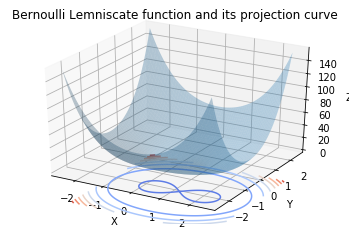

In [149]:


a = 1.0
b = np.sqrt(2)*a
delta = a / 100
x = np.arange(-2.5*a, 2.5*a, delta )
y = np.arange(-2.5*a, 2.5*a, delta )
X, Y = np.meshgrid(x, y)
Z = (X**2 + Y**2)**2 - 2*a**2 * (X**2 - Y**2)

# levels = np.arange(-0.25*a, 0.1*a, 0.01)

fig = plt.figure()
ax = fig.gca(projection='3d')

#yeet

# fig, ax = plt.subplots()
# ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', cmap=cm.coolwarm, offset=-50) 

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Bernoulli Lemniscate function and its projection curve')

# CS = ax2.contour(X, Y, Z)
# manual_locations = [(0.25*a, 0.25*a), (1.5*a, 1.5*a)]
# # # [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
# ax2.clabel(CS, inline=1, fontsize=7, manual=manual_locations)
# ax2.set_title('Contour plot of Bernoulli Lemniscate function')


plt.show()

In [226]:



def _test(x, y, a):
    """
    Test if point lies within the inner region of the lemniscate
    """
    return (x**2 + y**2)**2 - 2 * a**2 * (x**2 - y**2) < 0

def random_pair_gen(a, n):
    '''a generator which returns n pairs of uniformly
    distributed pseudo-random numbers, where the interval
    for x lies within:
    [0, a * sqrt(2))
    
    And the interval for y lies within:
    [0, a/2)
    
    Input:
    a: a constant
    n: total number of pairs
    '''
    i = 0
    while i < n:
        yield np.array([np.random.uniform(low=0,high= a*np.sqrt(2)), np.random.uniform(low=0,high=a/2)])
        i += 1

def calculate_lemn_area(a, n):
    """calculates lemniscate area using Monte Carlo method using a generator 
	and avoiding storing all sample values in memory
    
    Input:
    a: a constant
    n: total number of pairs
    """
    ins = 0
    for x,y in random_pair_gen(a, n):
        if _test(x,y,a): ins += 1
    
    # number of points within the inner region vs total number of points
    ratio = ins / n
    area = ratio * a * np.sqrt(2) * a / 2

    return 4 * area

In [240]:
def compare_approx_area(a, n):
    """
    Given a constant "a", we could approximate the lemniscate with formula: 2 * a**2
    
    Return the absolute difference between the formula above and the monte carlo method
    and round it to 5 decimals
    """
    area = 2 * a**2
    
    approx_area = calculate_lemn_area(a,n)
    
    return np.abs(round(area - approx_area, 5)), approx_area

In [241]:
# Feel free to change the a and n values
diff, approx_area = compare_approx_area(a=3, n=1000)
print(f"The approximated area using monte carlo is {approx_area}")
print(f"The difference between the approx are and 2a^2 is {diff}")

The approximated area using monte carlo is 17.997281794760006
The difference between the approx are and 2a^2 is 0.00272
